## Visualization

In [51]:
# Convert a Dataframe to Pandas for visualization.
df_pandas = df.toPandas()


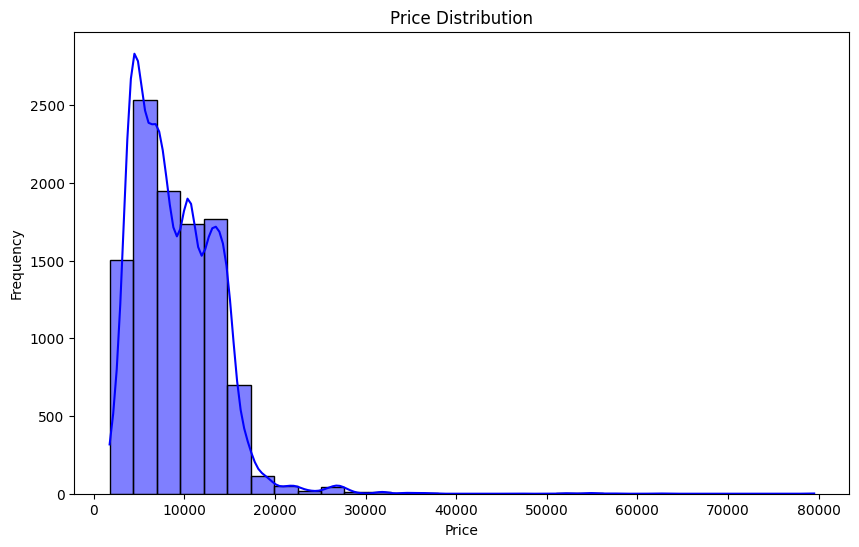

In [52]:
"""
This code visualizes the distribution of data in the Price column. The histogram shows the frequency of different value ranges, while the KDE curve offers a smoother estimate of the underlying data distribution. This helps to understand the distribution, central tendencies and variability of prices in the dataset.
"""

plt.figure(figsize=(10, 6))
sns.histplot(df_pandas['Price'], bins=30, kde=True, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()



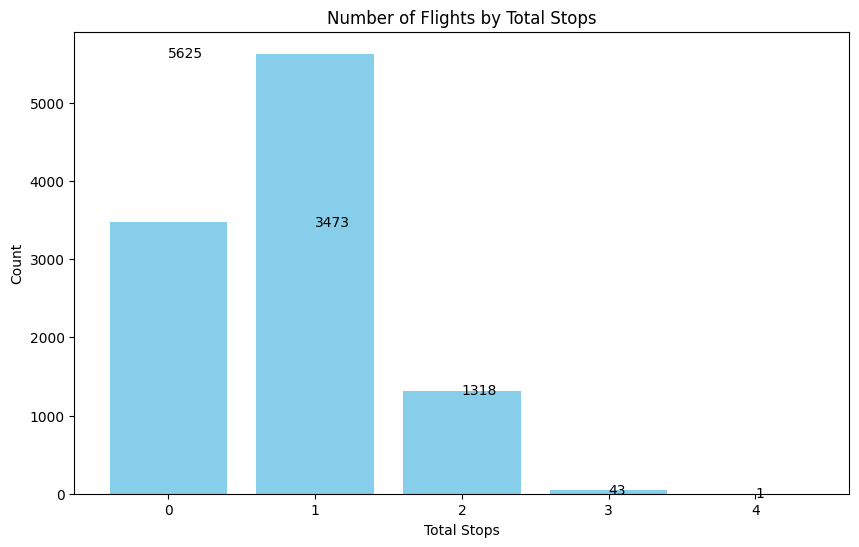

In [53]:
"""
This code shows the distribution of flights according to the number of stops. Each bar represents a stop category (e.g. non-stop, 1 stop), and the height of the bar indicates the total number of flights in that category. Annotations on the bars make the breakdowns easier to read.
"""
d=dict(df_pandas['Total_Stops'].value_counts())
values = list(d.values()) 

plt.figure(figsize=(10, 6))
plt.bar(list(d.keys()), list(d.values()), color='skyblue')
for i in range(len(d.keys())):
    plt.text(i,values[i], str(values[i]), va='center')
plt.title('Number of Flights by Total Stops')
plt.xlabel('Total Stops')
plt.ylabel('Count')
plt.show()

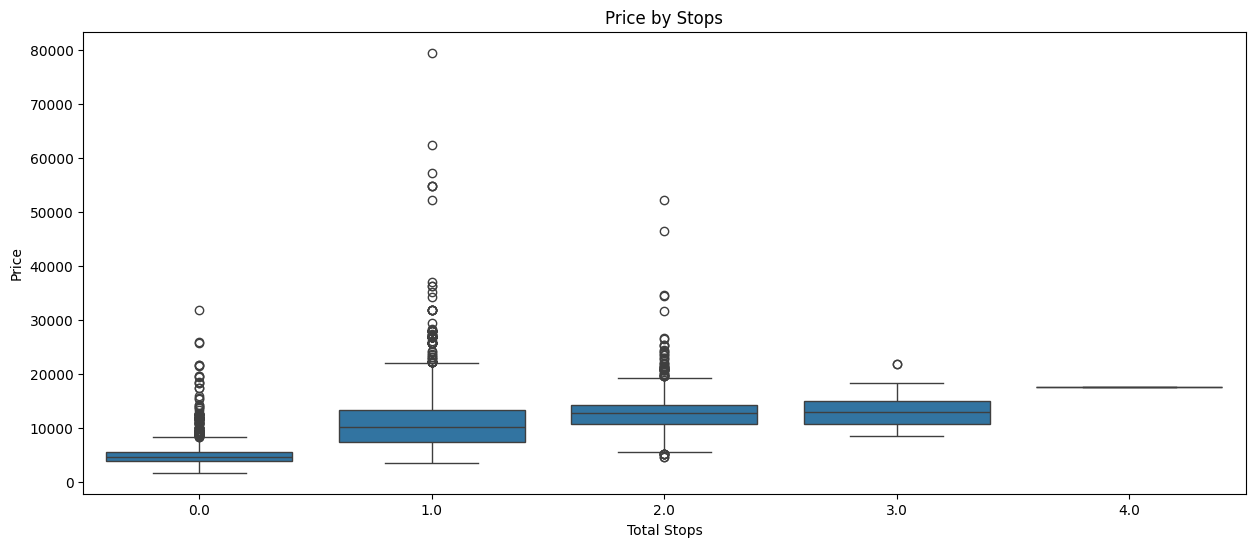

In [54]:
"""
This code helps you understand how ticket prices vary according to the number of stops (e.g. non-stop, 1-stop, etc.). Each box represents a category of stops and highlights price trends, such as:

Minimum, median and maximum prices for each category.
Price dispersion (indicated by box size and whiskers).
Any outliers, which appear as dots outside the whiskers.
This is useful for analyzing whether a greater number of stops is associated with lower prices, or whether prices vary widely within a category.


"""
plt.figure(figsize=(15, 6))
sns.boxplot(x='Total_Stops', y='Price', data=df_pandas)
plt.title('Price by Stops')
plt.xlabel('Total Stops')
plt.ylabel('Price')
plt.show()

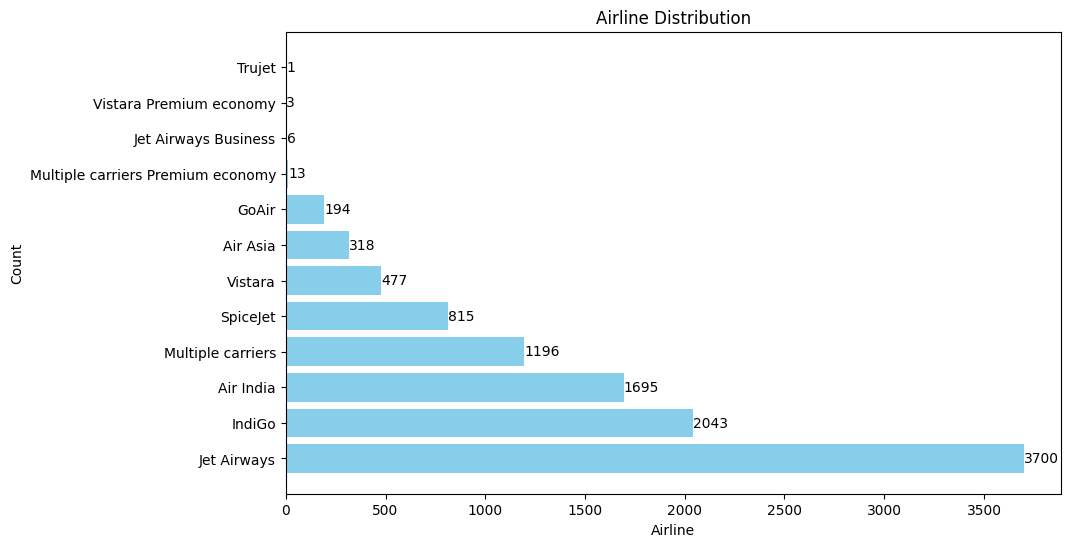

In [55]:
# "Repartition of flights by Airline"
d_1=dict(df_pandas['Airline'].value_counts())
values = list(d_1.values()) 

plt.figure(figsize=(10, 6))
plt.barh(list(d_1.keys()), list(d_1.values()), color='skyblue')
for i in range(len(d_1.keys())):
    plt.text(values[i], i, str(values[i]), va='center')
plt.title('Airline Distribution')
plt.xlabel('Airline')
plt.ylabel('Count')
plt.show()

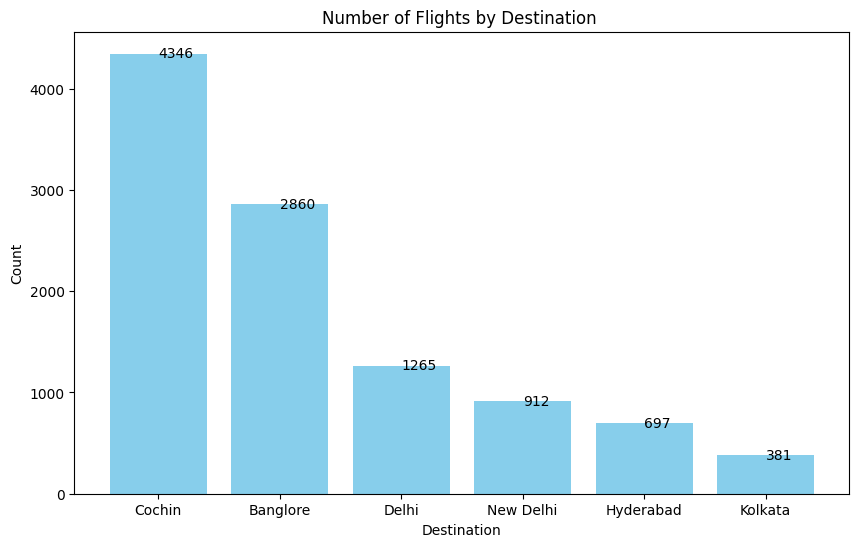

In [56]:
#Number of flight by destination
d_2=dict(df_pandas['Destination'].value_counts())
values = list(d_2.values()) 

plt.figure(figsize=(10, 6))
plt.bar(list(d_2.keys()), list(d_2.values()), color='skyblue')
for i in range(len(d_2.keys())):
    plt.text(i,values[i], str(values[i]), va='center')
plt.title('Number of Flights by Destination ')
plt.xlabel('Destination')
plt.ylabel('Count')
plt.show()

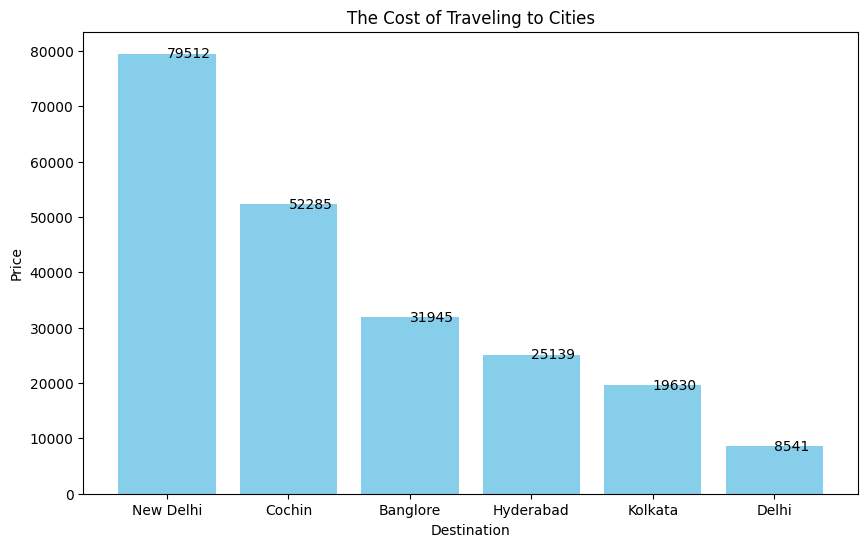

In [57]:
#Max costs for each  destination
prices=[]
destinations = list(set(df_pandas['Destination']))
for i in destinations:
    prices.append((df_pandas[df_pandas['Destination']==i]['Price']).max())
sorted_data = sorted(zip(destinations, prices), key=lambda x: x[1], reverse=True)
sorted_destinations = [x[0] for x in sorted_data]
sorted_prices = [x[1] for x in sorted_data]

plt.figure(figsize=(10, 6))  
plt.bar(sorted_destinations, sorted_prices, color='skyblue')
for i in range(len(sorted_destinations)):
    plt.text(i,sorted_prices[i], str(sorted_prices[i]), va='center')
plt.title('The Cost of Traveling to Cities')
plt.xlabel('Destination')
plt.ylabel('Price')  
plt.show()


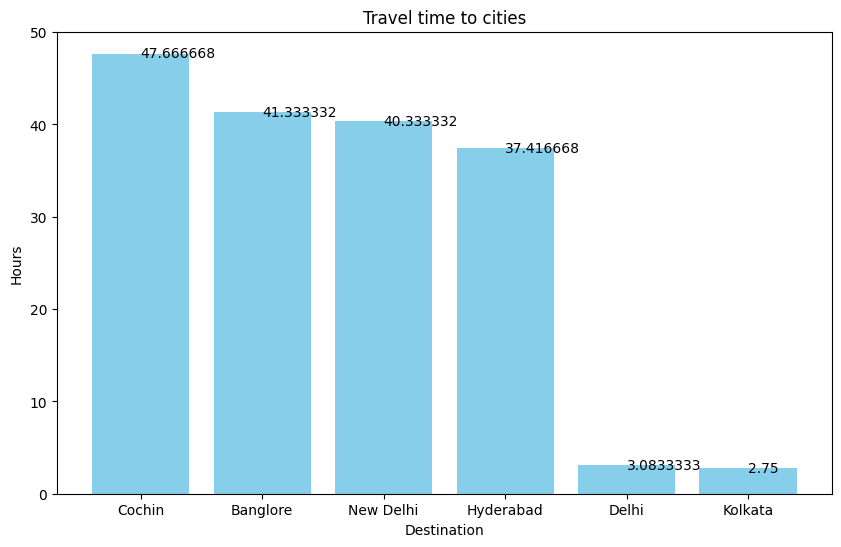

In [58]:
#Travel time max to cities
Hours=[]
destinations = list(set(df_pandas['Destination']))
for i in destinations:
    Hours.append((df_pandas[df_pandas['Destination']==i]['Duration']).max())
sorted_data = sorted(zip(destinations, Hours), key=lambda x: x[1], reverse=True)
sorted_destinations = [x[0] for x in sorted_data]
sorted_Hours = [x[1] for x in sorted_data]
plt.figure(figsize=(10, 6))  
plt.bar(sorted_destinations, sorted_Hours, color='skyblue')
for i in range(len(sorted_destinations)):
    plt.text(i,sorted_Hours[i], str(sorted_Hours[i]), va='center')
plt.title('Travel time to cities')
plt.xlabel('Destination')
plt.ylabel('Hours')  
plt.show()

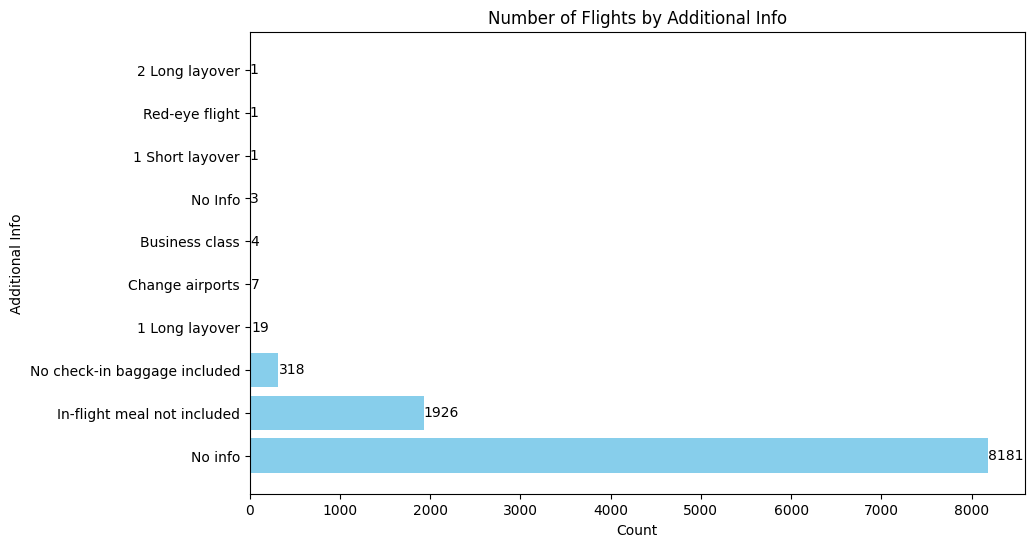

In [59]:
#Number of flights by additional info

d_4 = dict(df_pandas['Additional_Info'].value_counts())
values = list(d_4.values())  

plt.figure(figsize=(10, 6))
plt.barh(list(d_4.keys()), list(d_4.values()), color='skyblue')
for i in range(len(d_4.keys())):
    plt.text(values[i], i, str(values[i]), va='center')
plt.title('Number of Flights by Additional Info')
plt.xlabel('Count')
plt.ylabel('Additional Info')
plt.show()

Text(0.5, 1.0, 'Mean Price by Date of Journey')

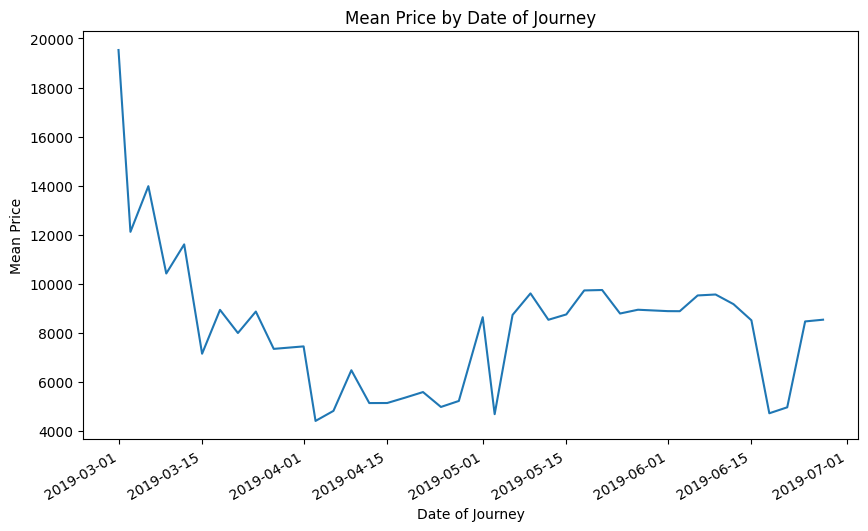

In [60]:
#Means of prices

plt.figure(figsize=(10, 6))

df_pandas["Date_of_Journey"] = pd.to_datetime(df_pandas["Date_of_Journey"])
date_prices = df_pandas.groupby("Date_of_Journey")["Price"].mean()
date_prices.plot()

plt.xlabel("Date of Journey")
plt.ylabel("Mean Price")
plt.title("Mean Price by Date of Journey")

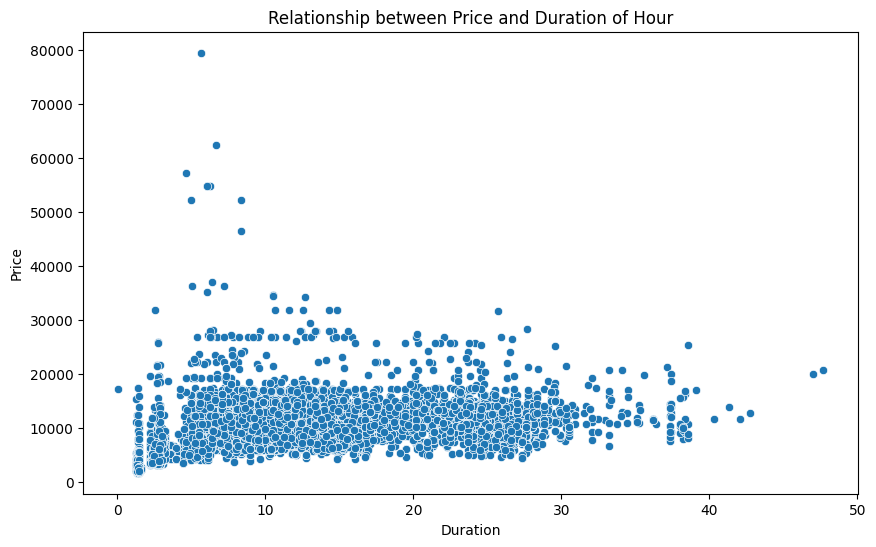

In [61]:
#Relationship between Price and Duration of Hour's
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration', y='Price', data=df_pandas)
plt.xlabel('Duration')
plt.ylabel('Price')
plt.title('Relationship between Price and Duration of Hour')
plt.show()

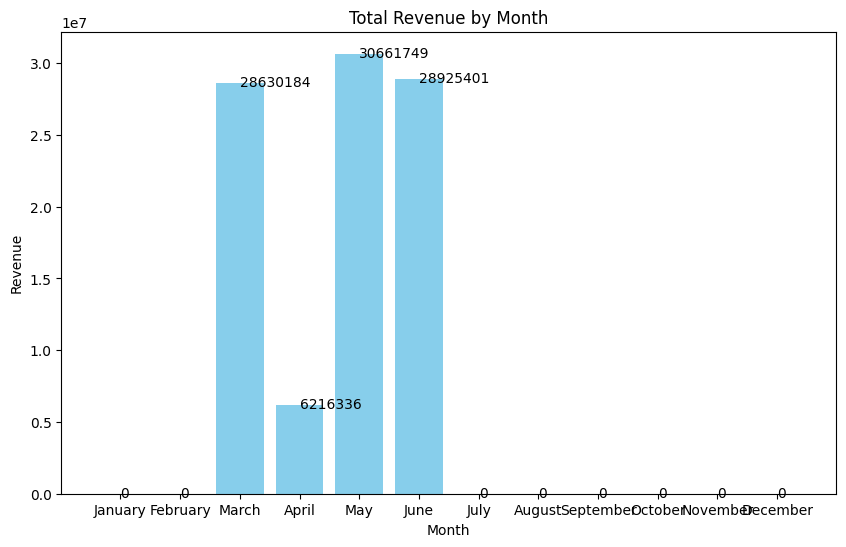

In [62]:
#Repartion of tickets prices for month

df_pandas["Day"]=df_pandas["Date_of_Journey"].dt.day
df_pandas["Month"]=df_pandas["Date_of_Journey"].dt.month
df_pandas["Year"]=df_pandas["Date_of_Journey"].dt.year

def month_name(month_number):
    month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    return month_names[month_number - 1]
df_pandas["Month_Name"] = df_pandas["Month"].apply(month_name)

mo = []
for i in range(1,13):
    mo.append(df_pandas[df_pandas['Month']==i]['Price'].sum())

months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

plt.figure(figsize=(10, 6))
plt.bar(months, mo, color='skyblue')
for i in range(len(months)):
    plt.text(i,mo[i], str(mo[i]), va='center')
plt.title('Total Revenue by Month')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

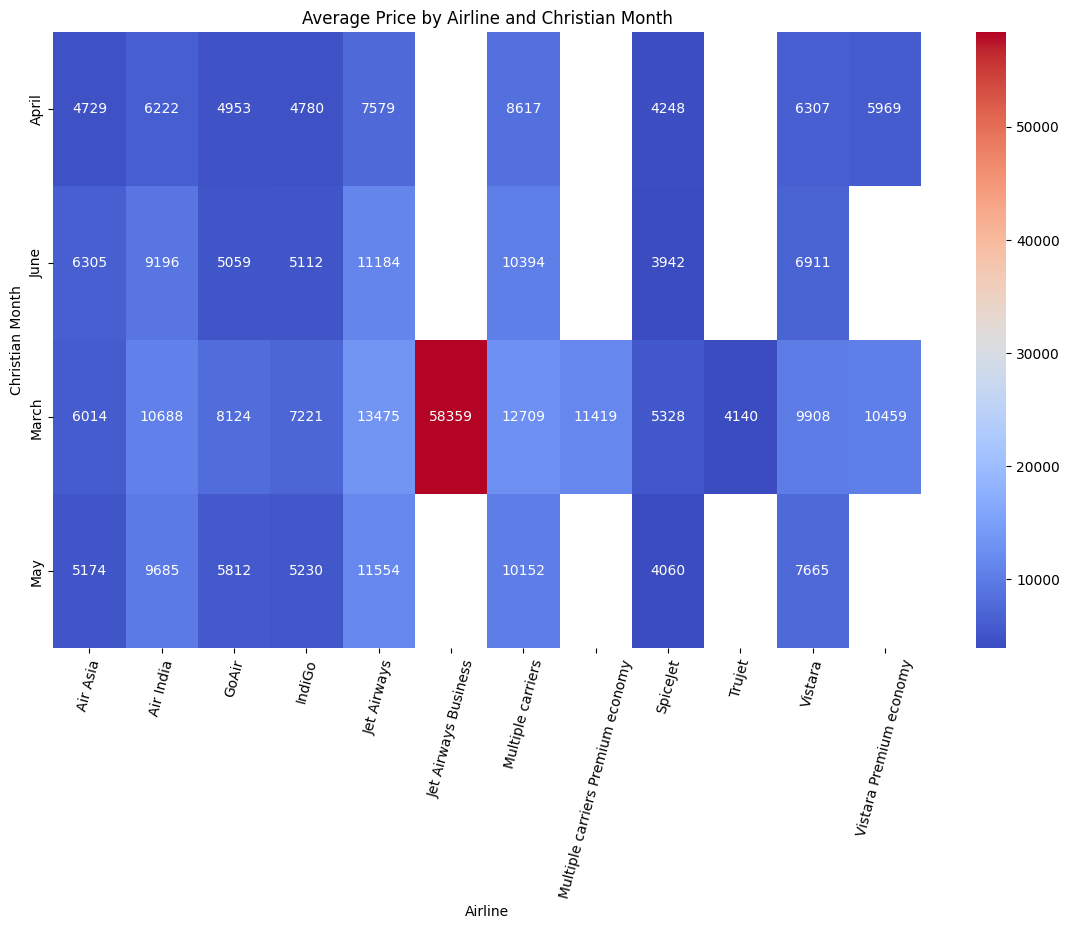

In [63]:
#Average price by Airline and Month

monthly_prices = df_pandas.pivot_table(index='Month_Name', columns='Airline', values='Price', aggfunc='mean')

plt.figure(figsize=(14, 8))
sns.heatmap(monthly_prices, cmap='coolwarm', annot=True, fmt=".0f")
plt.title('Average Price by Airline and Christian Month')
plt.xlabel('Airline')
plt.ylabel('Christian Month')
plt.xticks(rotation=75)
plt.show()

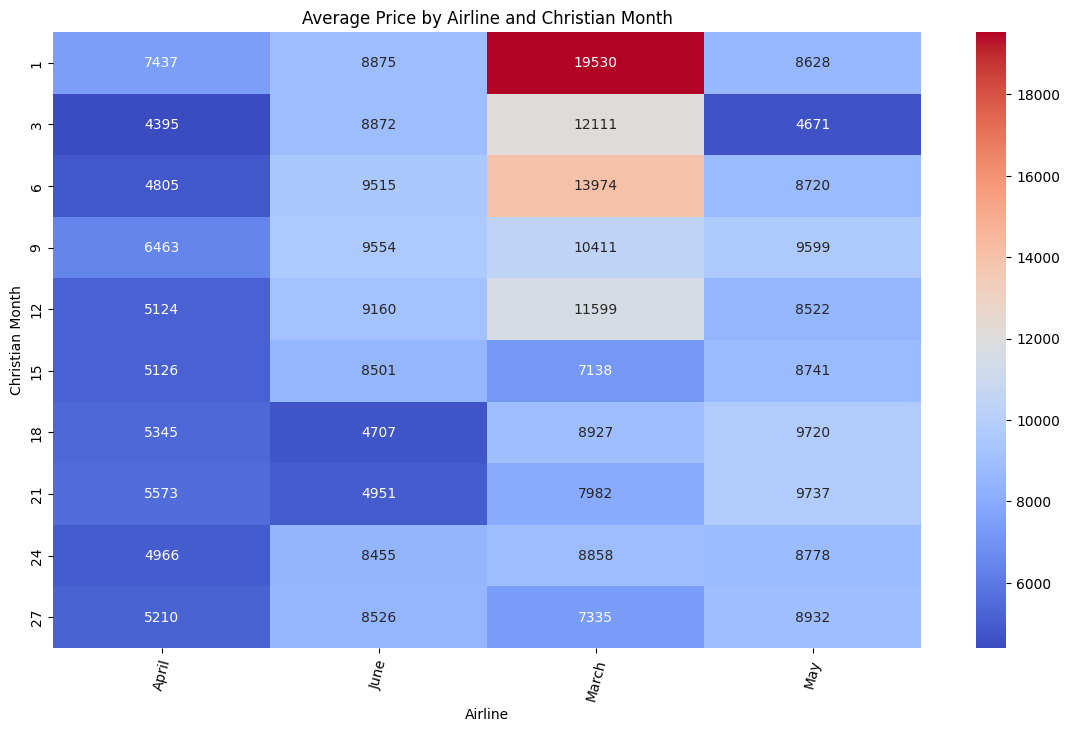

In [64]:
#Average price by Airline and Christian Month for day

monthly_prices=df_pandas.pivot_table(index='Day',columns='Month_Name',values='Price',aggfunc='mean')

plt.figure(figsize=(14, 8))
sns.heatmap(monthly_prices, cmap='coolwarm', annot=True, fmt=".0f")
plt.title('Average Price by Airline and Christian Month')
plt.xlabel('Airline')
plt.ylabel('Christian Month')
plt.xticks(rotation=75)
plt.show()